<a href="https://colab.research.google.com/github/warpiggly/Actividad/blob/master/Portafolio_N1_Spotify_%20Bot_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📚IMPORTACION DE DATOS Y LIBRERIAS📚**:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
df=pd.read_csv('SpotifyFeatures.csv')


In [ ]:
date=pd.DataFrame(df.dtypes , columns=['dtypes'])
date['unique']=df.nunique()
date.transpose()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
dtypes,object,object,object,object,int64,float64,float64,int64,float64,float64,object,float64,float64,object,float64,float64,object,float64
unique,27,14564,148614,176774,101,4734,1295,70749,2517,5400,12,1732,27923,2,1641,78512,5,1692


In [ ]:
date.columns.name='SpotifyFeatures'
date

SpotifyFeatures,dtypes,unique
genre,object,27
artist_name,object,14564
track_name,object,148614
track_id,object,176774
popularity,int64,101
acousticness,float64,4734
danceability,float64,1295
duration_ms,int64,70749
energy,float64,2517
instrumentalness,float64,5400


# **2-🧹LIMPIEZA DE DATOS🧹**

In [ ]:
# Verificar valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(pd.DataFrame({'Valores Faltantes': missing_values, 'Porcentaje (%)': missing_percentage}))


                  Valores Faltantes  Porcentaje (%)
genre                             0         0.00000
artist_name                       0         0.00000
track_name                        1         0.00043
track_id                          0         0.00000
popularity                        0         0.00000
acousticness                      0         0.00000
danceability                      0         0.00000
duration_ms                       0         0.00000
energy                            0         0.00000
instrumentalness                  0         0.00000
key                               0         0.00000
liveness                          0         0.00000
loudness                          0         0.00000
mode                              0         0.00000
speechiness                       0         0.00000
tempo                             0         0.00000
time_signature                    0         0.00000
valence                           0         0.00000


In [ ]:
# Identificar duplicados
print("Duplicados:", df.duplicated().sum())

# Eliminar duplicados
#df = df.drop_duplicates()

Duplicados: 0


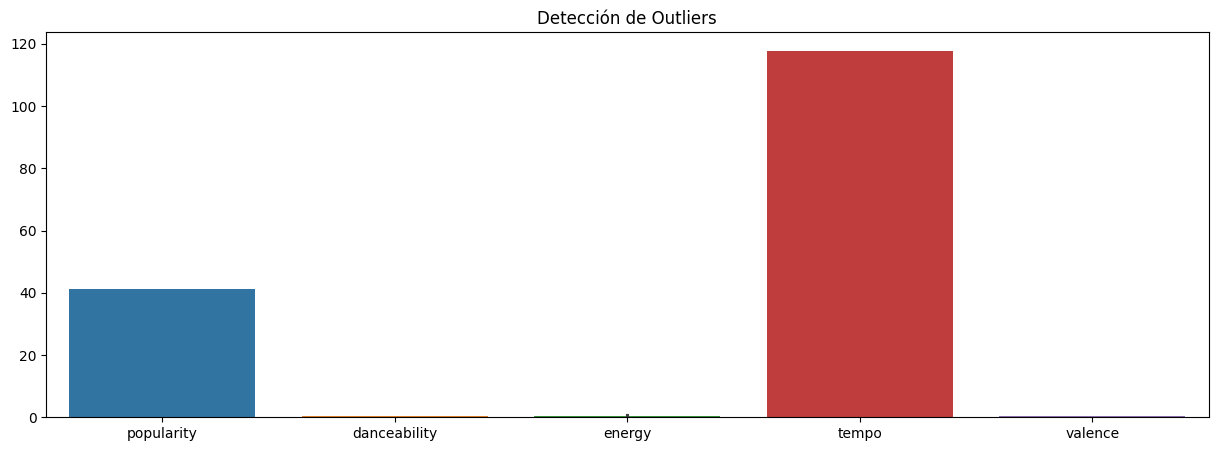

In [ ]:
# Graficar boxplots para detectar outliers
plt.figure(figsize=(15, 5))
sns.barplot(data=df[['popularity', 'danceability', 'energy', 'tempo', 'valence']])
plt.title("Detección de Outliers")
plt.show()

# **3-📈GRAFICAS Y VISUALIZACIONES📈**

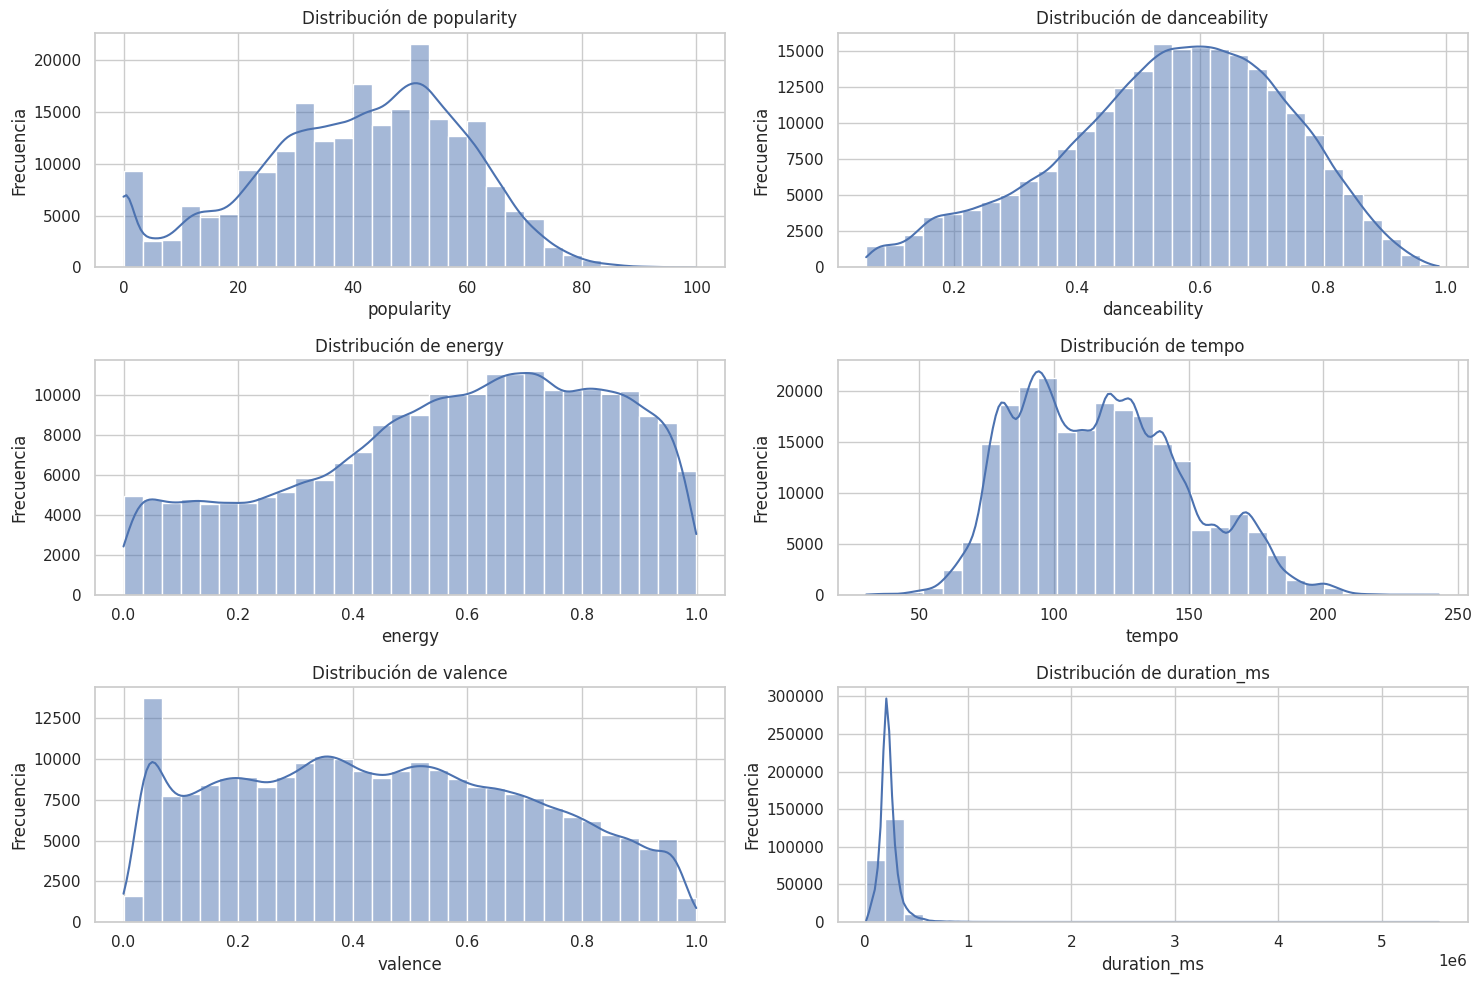

In [ ]:
# Ajustar el estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Graficar cada distribución en una fila de subplots
variables = ['popularity', 'danceability', 'energy', 'tempo', 'valence','duration_ms']
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Crear subplots
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

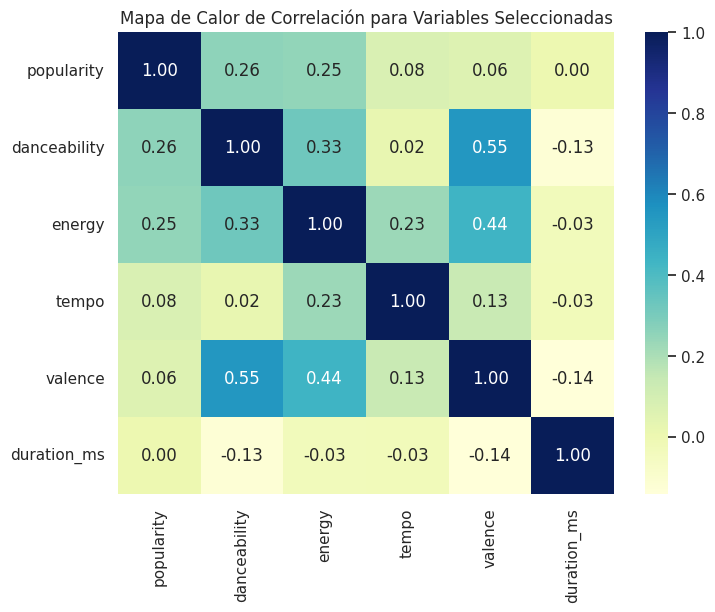

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
# Seleccionar columnas de interés
cols_of_interest = ['popularity', 'danceability', 'energy', 'tempo', 'valence','duration_ms']
correlation_matrix = df[cols_of_interest].corr()

# Crear heatmap solo de las variables seleccionadas
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Calor de Correlación para Variables Seleccionadas")
plt.show()

df.head()

# **4-🗃️AGRUPACION DE GENERO🗃️**

In [ ]:
# Agrupamos por 'genre' y calculamos el promedio de cada característica numérica
# Convertimos las columnas a numéricas antes de calcular la media,
# ignorando los errores que puedan surgir por valores no numéricos
genre_grouped = df.groupby('genre').agg({
    'tempo': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'duration_ms': lambda x: pd.to_numeric(x, errors='coerce').mean()/ 60000,
    'energy': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'popularity': lambda x: pd.to_numeric(x, errors='coerce').mean()
})

# Ordenamos los géneros por popularidad promedio
genre_grouped = genre_grouped.sort_values(by='popularity', ascending=False)
genre_grouped.head()

,tempo,duration_ms,energy,popularity
genre,,,,
Pop,121.175844,3.680986,0.642208,66.590667
Rap,121.100808,3.664231,0.650520,60.533795
Rock,122.629630,3.950054,0.683670,59.619392
Hip-Hop,120.791039,3.666365,0.643275,58.423131
Dance,120.795919,3.771082,0.698067,57.275256


In [ ]:
# Suponiendo que el DataFrame tiene las columnas 'genre' y 'tempo'

# Agrupar por género y calcular media, mediana y moda para cada género
estadisticas_por_genero = genre_grouped.groupby('genre')['tempo'].agg(
    media='mean',
    mediana='median',
    moda=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Mostrar las estadísticas de tendencia central para cada género
print(estadisticas_por_genero)



                       media     mediana        moda
genre                                               
A Capella         111.518950  111.518950  111.518950
Alternative       122.534485  122.534485  122.534485
Anime             126.629156  126.629156  126.629156
Blues             121.137637  121.137637  121.137637
Children's Music  121.131288  121.131288  121.131288
Children’s Music  121.931104  121.931104  121.931104
Classical         104.341807  104.341807  104.341807
Comedy             98.235488   98.235488   98.235488
Country           123.414419  123.414419  123.414419
Dance             120.795919  120.795919  120.795919
Electronic        125.845967  125.845967  125.845967
Folk              118.748882  118.748882  118.748882
Hip-Hop           120.791039  120.791039  120.791039
Indie             119.290814  119.290814  119.290814
Jazz              111.783658  111.783658  111.783658
Movie             113.946770  113.946770  113.946770
Opera             101.802977  101.802977  101.

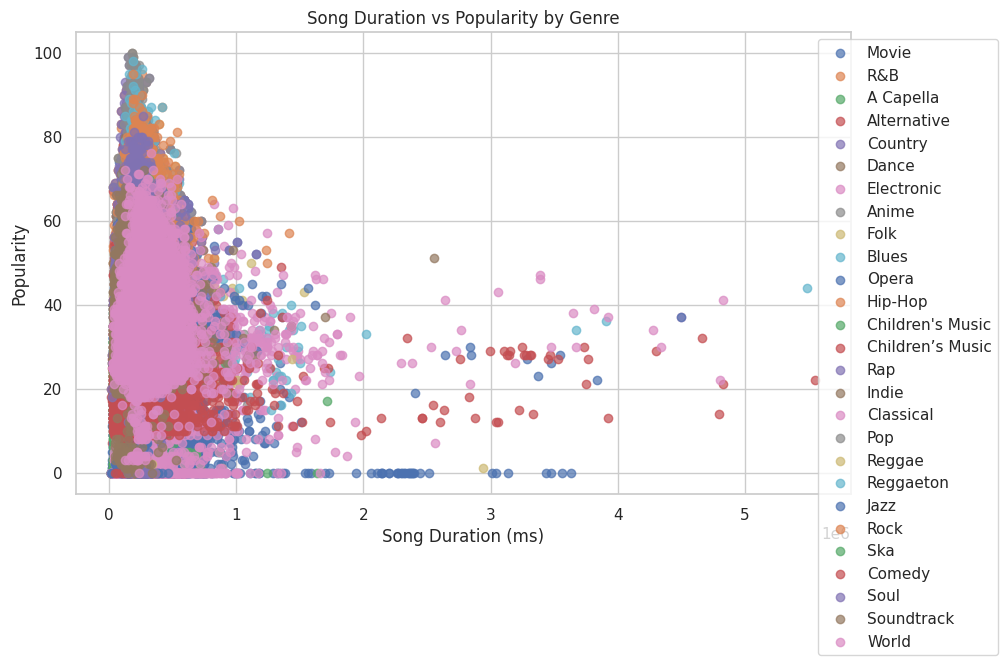

In [ ]:
# @title Song Duration vs Popularity by Genre

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
for genre in df['genre'].unique():
    genre_data = df[df['genre'] == genre]
    plt.scatter(genre_data['duration_ms'], genre_data['popularity'], label=genre, alpha=0.7)

plt.xlabel('Song Duration (ms)')
plt.ylabel('Popularity')
plt.title('Song Duration vs Popularity by Genre')
_ = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))


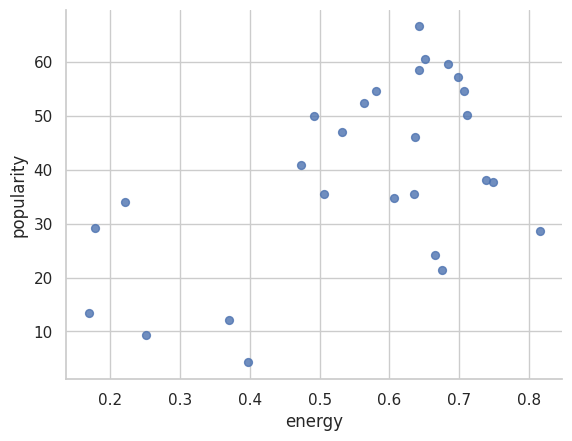

In [ ]:
# @title energy vs popularity

from matplotlib import pyplot as plt
genre_grouped.plot(kind='scatter', x='energy', y='popularity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

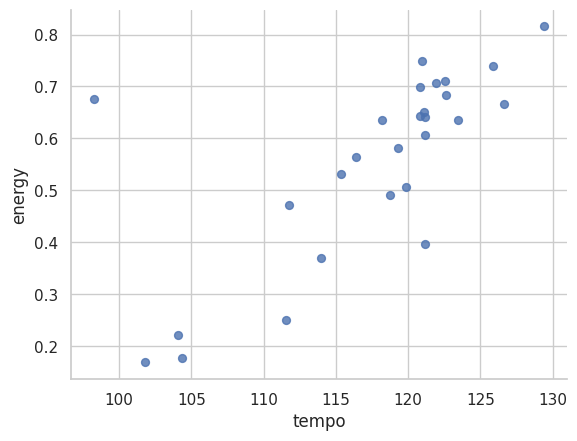

In [ ]:
# @title tempo vs energy

from matplotlib import pyplot as plt
genre_grouped.plot(kind='scatter', x='tempo', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

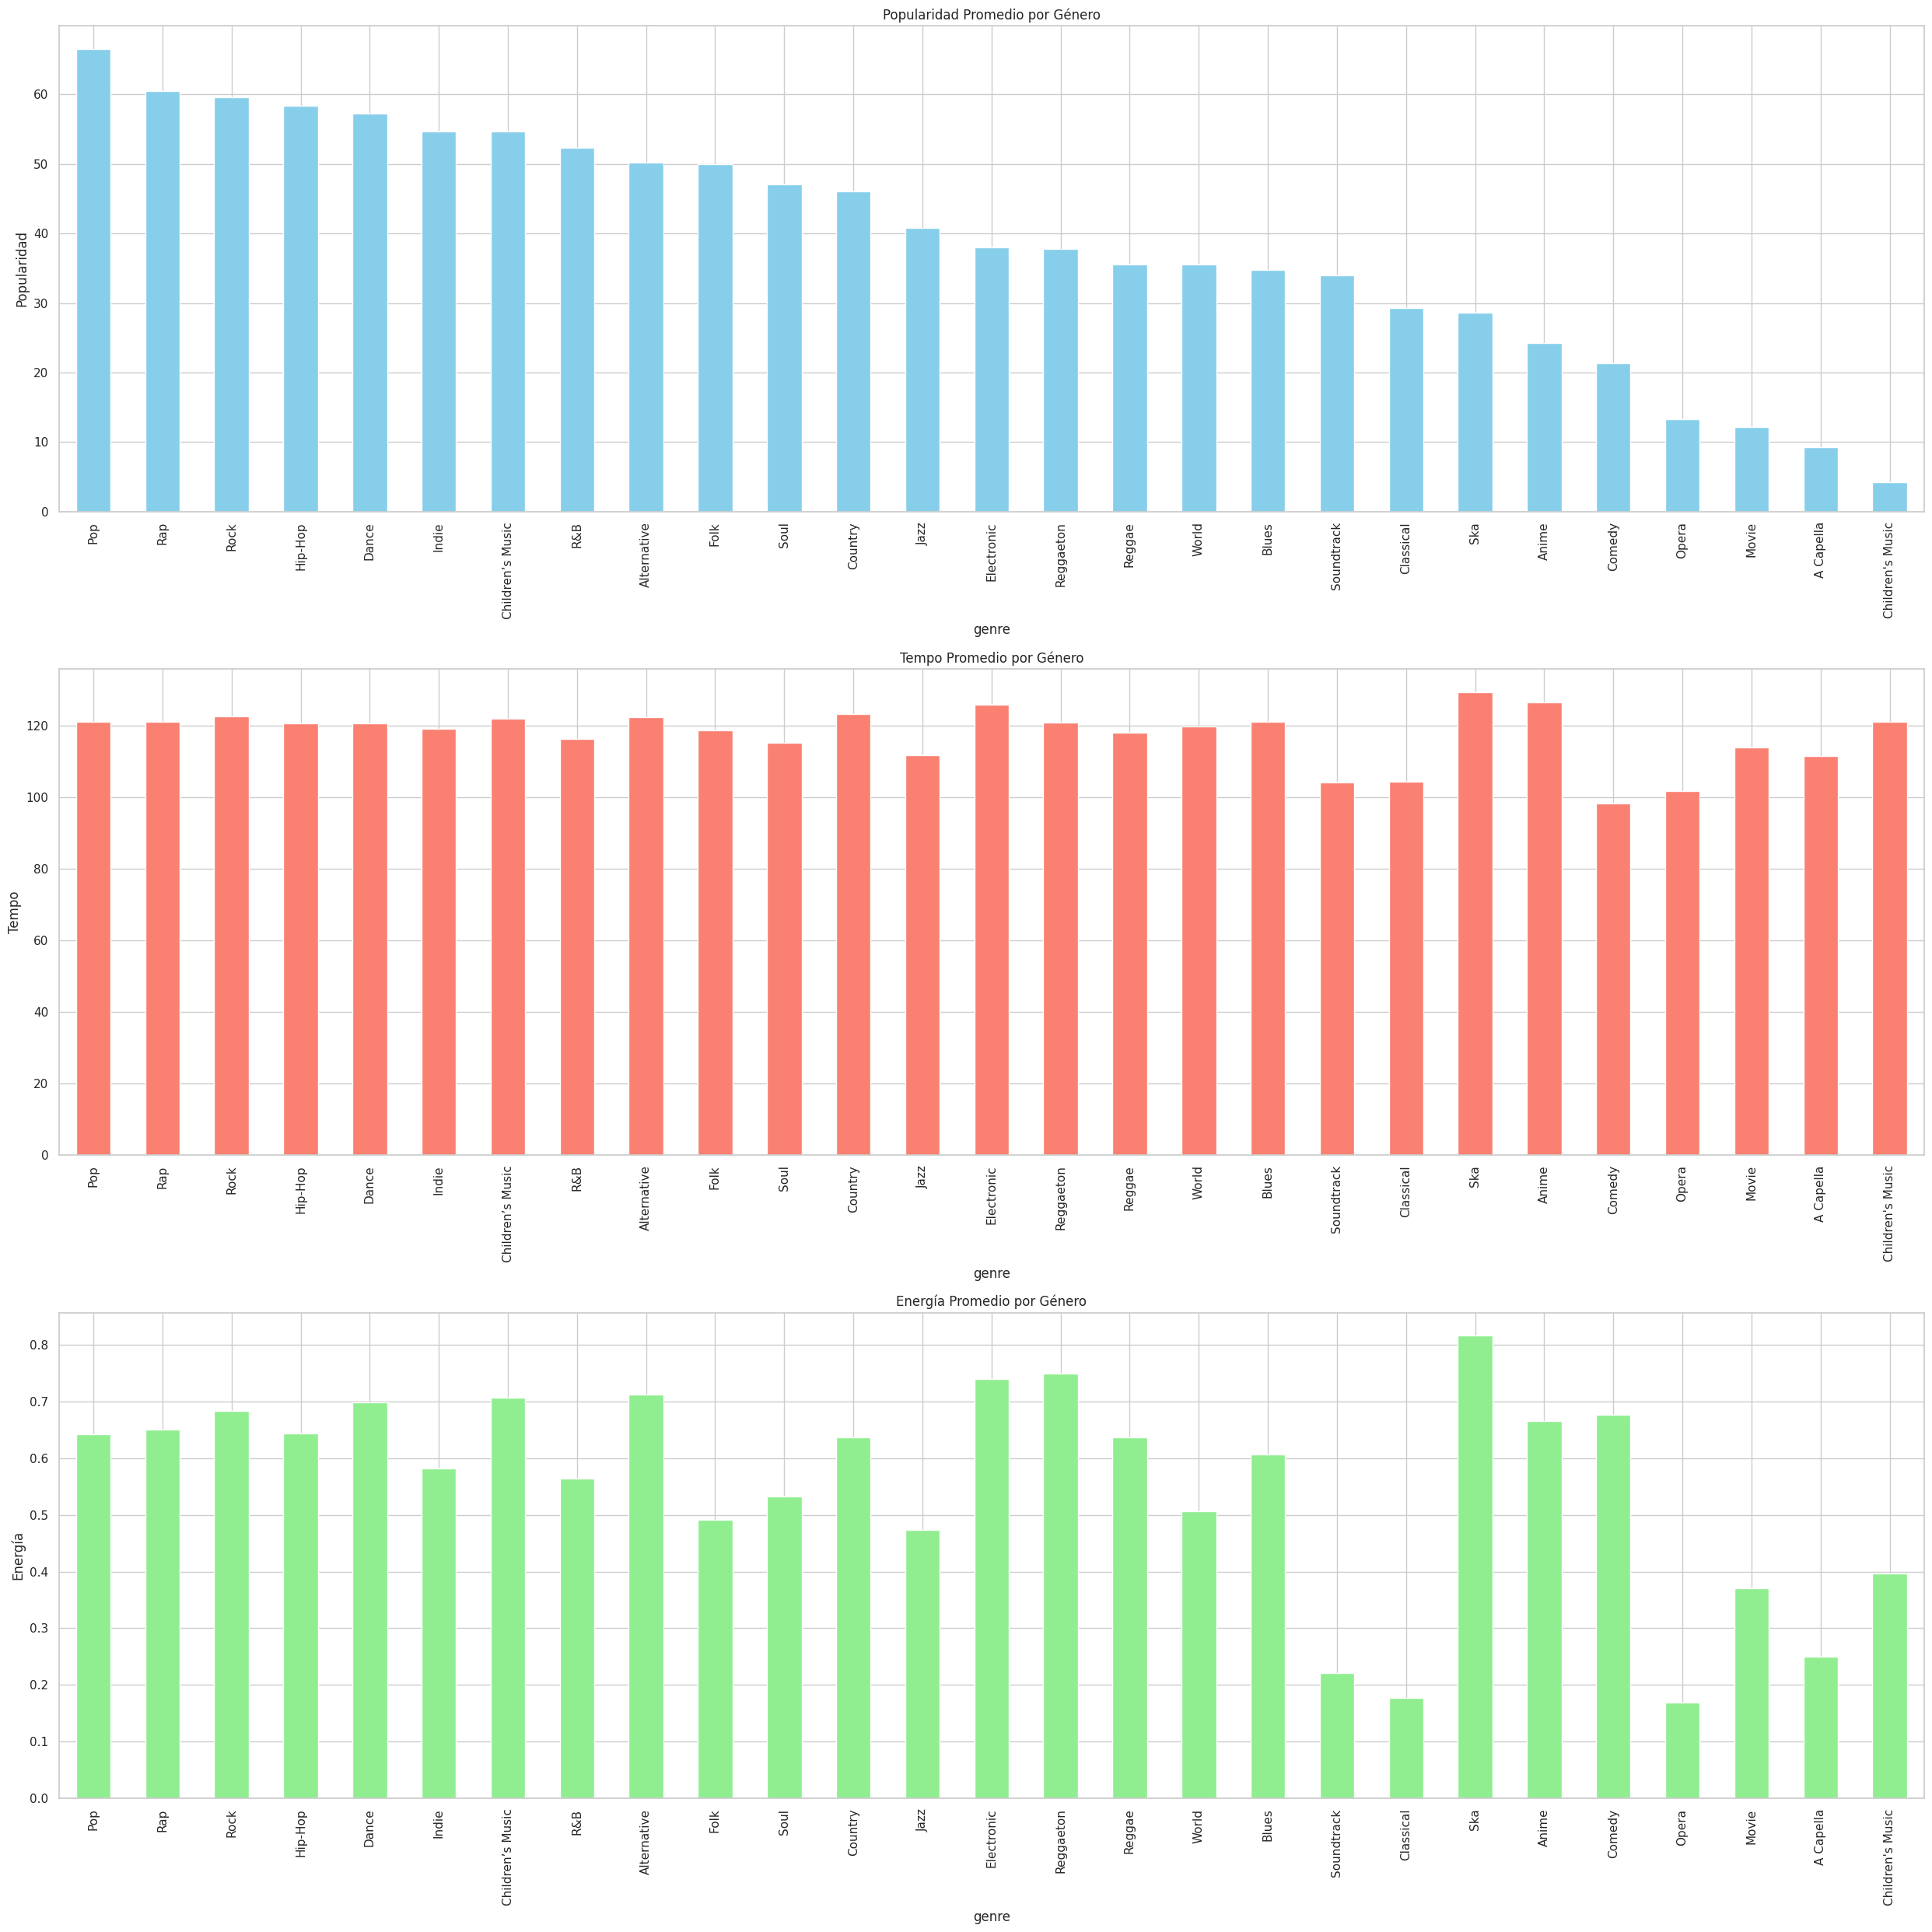

In [ ]:
# Configuración del tamaño de las gráficas
plt.figure(figsize=(25, 25))

# Gráfico de barras para la popularidad promedio por género
plt.subplot(3, 1, 1)
genre_grouped['popularity'].plot(kind='bar', color='skyblue')
plt.title('Popularidad Promedio por Género')
plt.ylabel('Popularidad')

# Gráfico de barras para el tempo promedio por género
plt.subplot(3, 1, 2)
genre_grouped['tempo'].plot(kind='bar', color='salmon')
plt.title('Tempo Promedio por Género')
plt.ylabel('Tempo')

# Gráfico de barras para la energía promedio por género
plt.subplot(3, 1, 3)
genre_grouped['energy'].plot(kind='bar', color='lightgreen')
plt.title('Energía Promedio por Género')
plt.ylabel('Energía')

# Ajustar y mostrar la gráfica
plt.tight_layout()
plt.show()

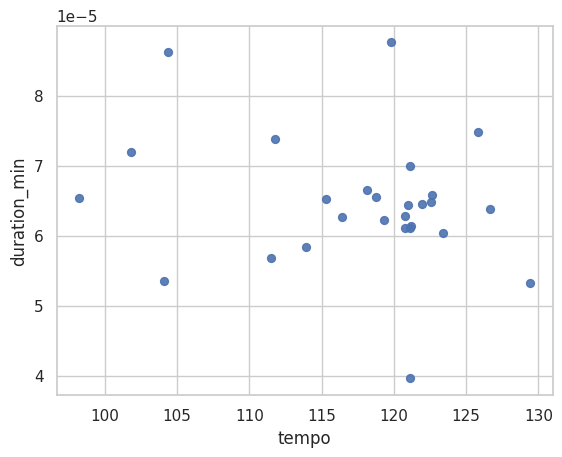

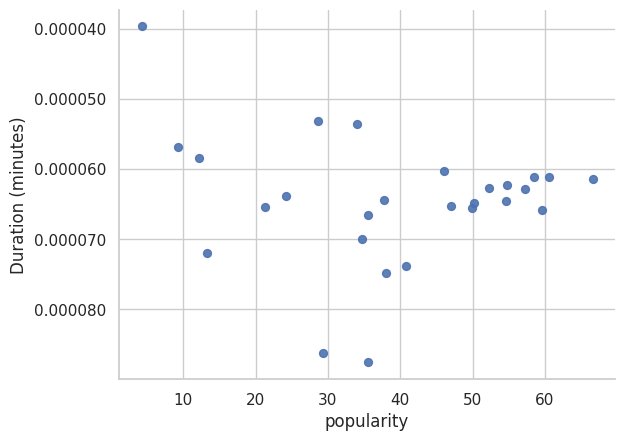

In [ ]:
# Crear una columna en minutos
# genre_grouped['duration_min'] = genre_grouped['duration_ms'] / 60000

# Graficar usando la columna de minutos
genre_grouped.plot(kind='scatter', x='tempo', y='duration_min', s=32, alpha=0.9)
genre_grouped.plot(kind='scatter', x='popularity', y='duration_min', s=32, alpha=0.9)

# Ajustes adicionales
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel("Duration (minutes)")  # Etiqueta del eje Y
plt.gca().invert_yaxis()  # Invertir el eje Y para que vaya de mayor a menor

# Formato de etiquetas del eje Y para mostrar decimales
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.6f}'))

plt.show()

# **5-📉MAS GRAFICAS TEMPO📉**

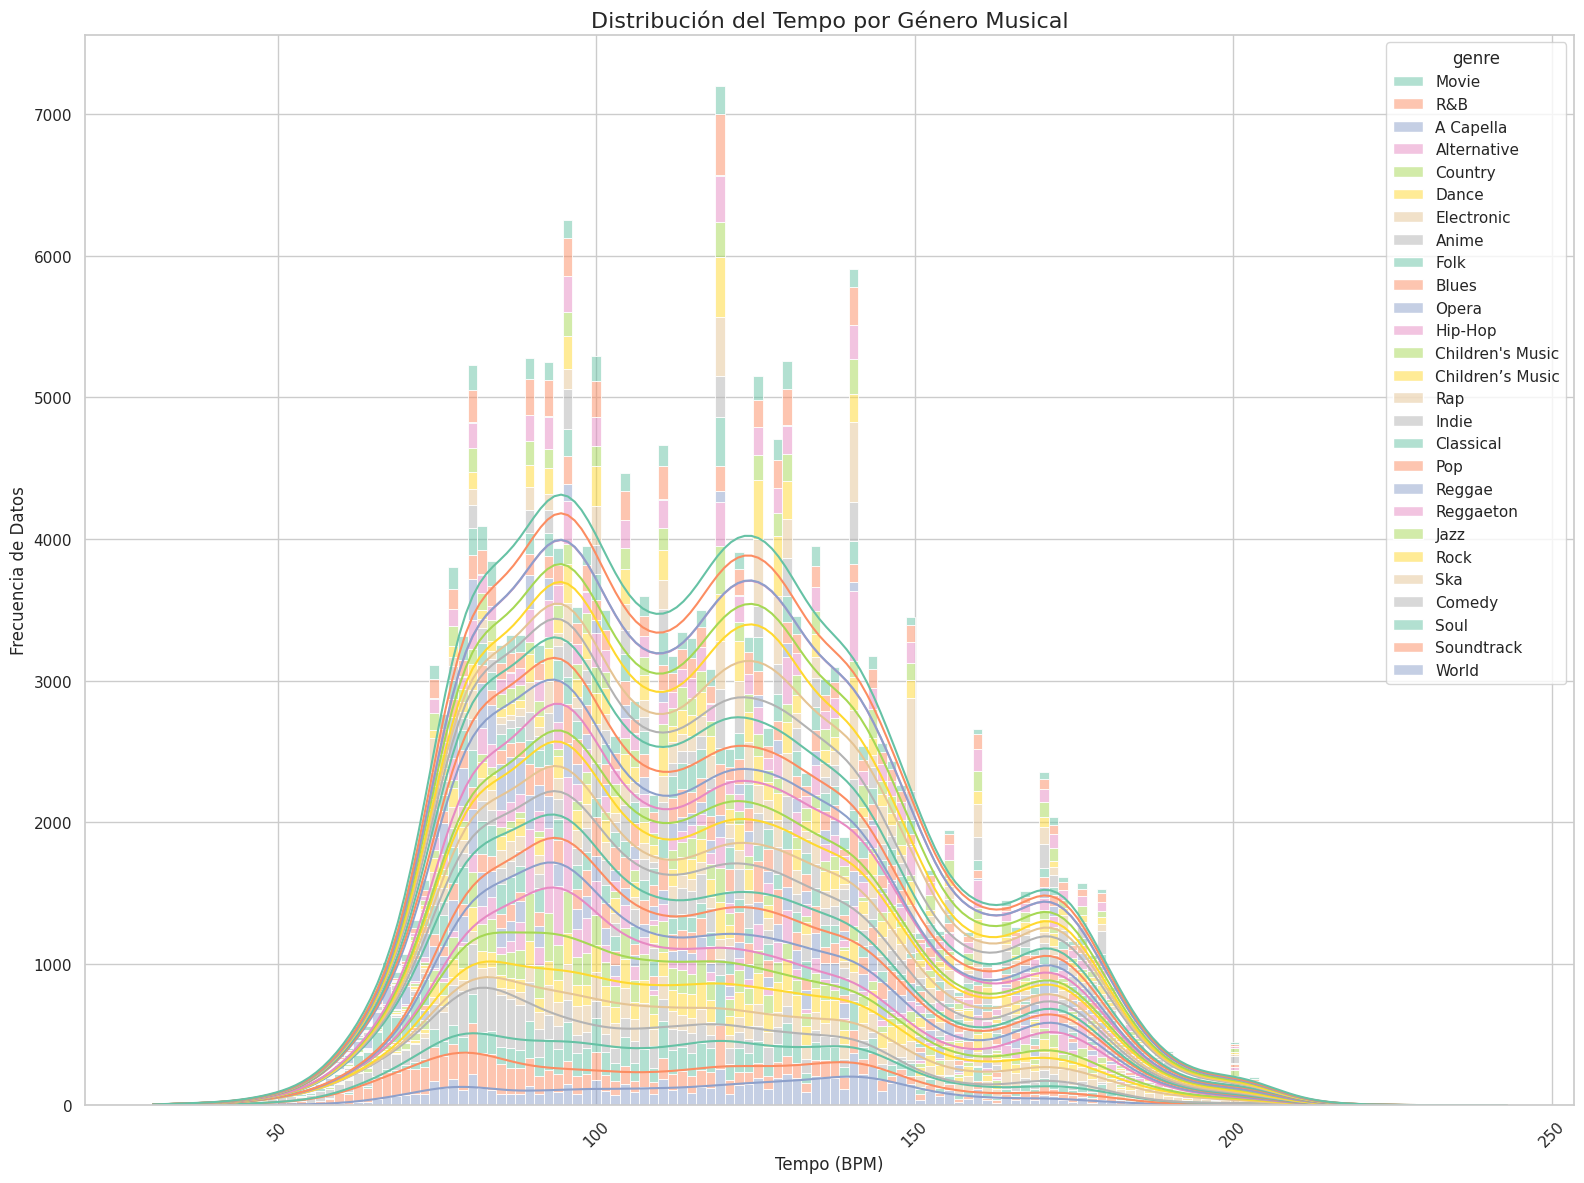

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("SpotifyFeatures.csv")

# Crear los histogramas
plt.figure(figsize=(16, 12))

# Usar seaborn para crear el histograma
sns.histplot(data=df, x="tempo", hue="genre", kde=True, multiple="stack", palette="Set2")

# Añadir títulos y etiquetas
plt.title("Distribución del Tempo por Género Musical", fontsize=16)
plt.xlabel("Tempo (BPM)", fontsize=12)
plt.ylabel("Frecuencia de Datos", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:


# Load data from the CSV file using pd.read_csv
df = pd.read_csv("SpotifyFeatures.csv")

# Calculate minimum and maximum tempo values per genre
tempo_min_max = df.groupby('genre')['tempo'].agg(['min', 'max'])

# Display the results
print(tempo_min_max)

estadisticas_por_genero = genre_grouped.groupby('genre')['tempo'].agg(
    media='mean',
    mediana='median',
    moda=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
# Calcular la media general de todas las medias por género
media_general = estadisticas_por_genero['media'].mean()

# Mostrar el resultado de las estadísticas por género
print(estadisticas_por_genero)

# Mostrar la media general
print(f'Media general de tempo: {media_general}')


                     min      max
genre                            
A Capella         37.861  181.714
Alternative       44.194  213.788
Anime             32.080  220.276
Blues             35.204  242.903
Children's Music  33.792  220.119
Children’s Music  46.693  213.788
Classical         34.208  212.923
Comedy            32.451  207.157
Country           48.718  217.538
Dance             44.573  218.081
Electronic        35.551  220.169
Folk              37.114  236.799
Hip-Hop           39.497  214.126
Indie             38.017  219.331
Jazz              34.765  239.848
Movie             32.244  232.602
Opera             34.151  236.735
Pop               39.497  213.990
R&B               36.710  216.636
Rap               39.497  216.115
Reggae            51.039  218.184
Reggaeton         60.623  234.923
Rock              34.717  219.331
Ska               53.065  221.578
Soul              36.542  216.636
Soundtrack        30.379  216.429
World             33.593  212.923
              

# **6-🗿ROBOT DE RECOMENDACION🗿**

In [ ]:
# Seleccionar las columnas relevantes para el modelo de recomendación
features = ['acousticness', 'danceability', 'energy', 'loudness', 'valence', 'tempo']

# Eliminar filas con valores nulos
df = df.dropna(subset=features)

# Verificar después del filtrado
print(df[features].head())

   acousticness  danceability  energy  loudness  valence    tempo
0         0.611         0.389   0.910    -1.828    0.814  166.969
1         0.246         0.590   0.737    -5.559    0.816  174.003
2         0.952         0.663   0.131   -13.879    0.368   99.488
3         0.703         0.240   0.326   -12.178    0.227  171.758
4         0.950         0.331   0.225   -21.150    0.390  140.576


In [ ]:
# Normalización de los datos
scaler = StandardScaler()
df_scaled = df[features]
df_scaled = scaler.fit_transform(df_scaled)

# Convertir a DataFrame para facilitar su manipulación
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Verificar las primeras filas después de la normalización
print(df_scaled.head())

   acousticness  danceability    energy  loudness   valence     tempo
0      0.683376     -0.890935  1.286908  1.290703  1.380744  1.595607
1     -0.345467      0.191994  0.630249  0.668683  1.388435  1.823253
2      1.644570      0.585296 -1.669954 -0.718402 -0.334212 -0.588326
3      0.942701     -1.693703 -0.929789 -0.434817 -0.876384  1.750597
4      1.638932     -1.203422 -1.313157 -1.930601 -0.249618  0.741433


In [ ]:
# Crear el modelo KNN
knn = NearestNeighbors(n_neighbors=30, algorithm='auto', metric='cosine')

# Ajustar el modelo con las características normalizadas
knn.fit(df_scaled)

# Verificar el modelo
print(knn)

NearestNeighbors(metric='cosine', n_neighbors=30)


In [ ]:
# Función para hacer recomendaciones para una canción dada
def recomendar_canciones(song_idx):
    song_features = df_scaled.iloc[song_idx].values.reshape(1, -1)  # Obtener las características de la canción
    distances, indices = knn.kneighbors(song_features)  # Buscar las canciones más similares
    recommended_songs = df.iloc[indices[0]]  # Obtener las canciones recomendadas
    print(f"Recomendaciones para la canción: {df.iloc[song_idx]['track_name']}")
    return recommended_songs[['track_name', 'artist_name', 'genre']], distances # Return distances as well


# Ejemplo de recomendación para una canción específica (por ejemplo, canción en índice 10)
song_idx = 10
recomendaciones, distances = recomendar_canciones(song_idx) # Assign the returned distances
print(recomendaciones)

Recomendaciones para la canción: Symphony No.4 In E Minor Op.98 : IV. Allegro Energico E Passionato
                                               track_name  \
10      Symphony No.4 In E Minor Op.98 : IV. Allegro E...   
195476             L'Etoile du bonheur (from 'Pinocchio')   
58054   Roméo et Juliette, Acte II: "L'amour... Ah! Lè...   
123405  Rusalka, Op. 114, B. 203, Act III: Vyrvána živ...   
202006                                         The Kelpie   

                artist_name       genre  
10        Leopold Stokowski       Movie  
195476        Leigh Harline       Movie  
58054        Charles Gounod       Opera  
123405       Antonín Dvořák   Classical  
202006  James Newton Howard  Soundtrack  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
# Función para hacer recomendaciones para una canción dada
def recomendar_canciones(song_idx):
    song_features = df_scaled.iloc[song_idx].values.reshape(1, -1)  # Obtener las características de la canción
    distances, indices = knn.kneighbors(song_features)  # Buscar las canciones más similares
    recommended_songs = df.iloc[indices[0]]  # Obtener las canciones recomendadas
    print(f"Recomendaciones para la canción: {df.iloc[song_idx]['track_name']}")
    return recommended_songs[['track_name', 'artist_name', 'genre']], distances # Return distances as well


# Ejemplo de recomendación para una canción específica (por ejemplo, canción en índice 10)
song_idx = 155139
recomendaciones, distances = recomendar_canciones(song_idx) # Assign the returned distances
print(recomendaciones)

Recomendaciones para la canción: Sonne
                         track_name              artist_name             genre
155139                        Sonne                Rammstein              Rock
4864                          Sonne                Rammstein       Alternative
97670                         Sonne                Rammstein  Children’s Music
18533               Waste The Night      5 Seconds of Summer             Dance
26209                     Testament                  JayKode        Electronic
207460               There Is Power         Lincoln Brewster             World
155748               There Is Power         Lincoln Brewster              Rock
97829                There Is Power         Lincoln Brewster  Children’s Music
5545                 There Is Power         Lincoln Brewster       Alternative
34256                   Kick & Spin             [ALEXANDROS]             Anime
215221          Red, White And Blue           Travis Denning           Country
112732       

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


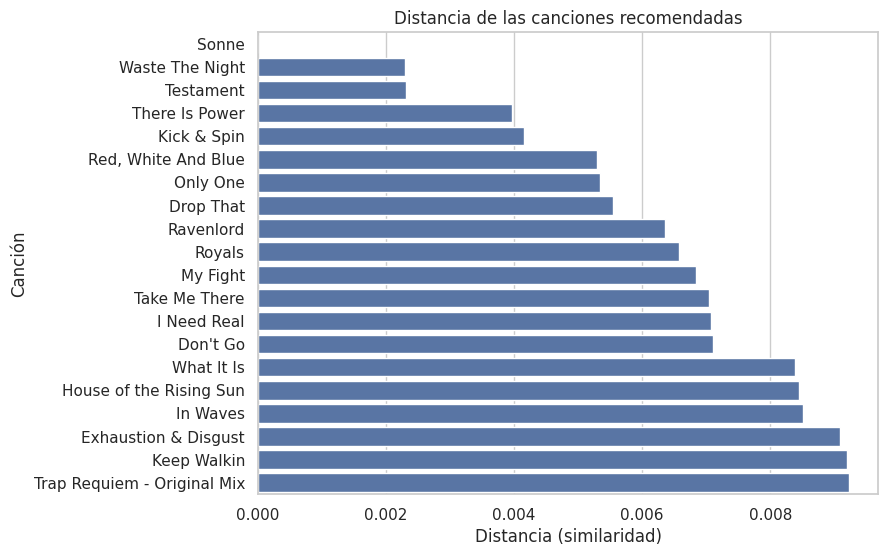

In [ ]:
# Visualizar la distancia de las canciones recomendadas
plt.figure(figsize=(8, 6))
sns.barplot(x=distances[0], y=recomendaciones['track_name'])
plt.title('Distancia de las canciones recomendadas')
plt.xlabel('Distancia (similaridad)')
plt.ylabel('Canción')
plt.show()

